In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('stores_1_to_35.csv')
df.head()

,Unnamed: 0,Store,Date,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Weekly_Sales,Type,Size,Weekly_Sales.1
0,0,1,2/5/2010,False,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833,1643690.90,A,151315,1643690.90
1,1,1,2/12/2010,True,51.65,3.409,8687.47,1594.87,2.20,2144.87,223.753643,6.833,1641957.44,A,151315,1641957.44
2,2,1,2/19/2010,False,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833,1611968.17,A,151315,1611968.17
3,5,1,3/12/2010,False,60.71,3.669,8368.50,298.46,1.39,1340.29,224.562029,6.833,1439541.59,A,151315,1439541.59
4,6,1,3/19/2010,False,64.00,3.734,2588.06,80.89,3.20,909.76,224.716695,6.833,1472515.79,A,151315,1472515.79


In [3]:
dfa=df.copy()
dfa.drop(df[df.Type =='C'].index, inplace=True)

In [4]:
dfa.drop(dfa[dfa.Store >10].index, inplace=True)

In [5]:
dfa

,Unnamed: 0,Store,Date,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Weekly_Sales,Type,Size,Weekly_Sales.1
0,0,1,2/5/2010,False,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833,1643690.90,A,151315,1643690.90
1,1,1,2/12/2010,True,51.65,3.409,8687.47,1594.87,2.20,2144.87,223.753643,6.833,1641957.44,A,151315,1641957.44
2,2,1,2/19/2010,False,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833,1611968.17,A,151315,1611968.17
3,5,1,3/12/2010,False,60.71,3.669,8368.50,298.46,1.39,1340.29,224.562029,6.833,1439541.59,A,151315,1439541.59
4,6,1,3/19/2010,False,64.00,3.734,2588.06,80.89,3.20,909.76,224.716695,6.833,1472515.79,A,151315,1472515.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,1770,10,8/17/2012,False,88.83,4.002,4407.90,0.00,7.20,3037.56,130.790968,7.170,1597868.05,B,126512,1827797.40
385,1773,10,9/7/2012,True,83.07,4.124,11848.88,20.00,47.52,3530.47,130.932548,7.170,1661767.33,B,126512,1708283.28
386,1775,10,9/21/2012,False,81.93,4.125,11273.56,245.91,27.00,2976.50,131.010333,7.170,1671857.57,B,126512,1671857.57
387,1776,10,9/28/2012,False,82.52,3.966,6091.96,62.82,2.82,3350.88,131.043000,7.170,1437059.26,B,126512,1694862.41


<Figure size 864x288 with 0 Axes>

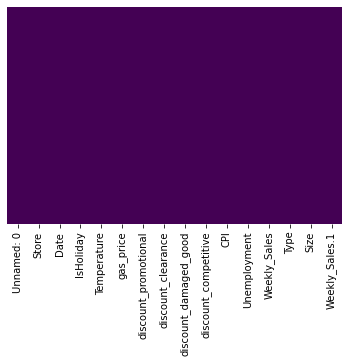

<Figure size 864x288 with 0 Axes>

In [6]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.figure(figsize=(12,4))

In [7]:
dfa.describe()

,Unnamed: 0,Store,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Weekly_Sales,Size,Weekly_Sales.1
count,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,3.890000e+02,389.000000,3.890000e+02
mean,809.208226,4.861183,63.521440,3.492257,7293.894139,3188.332956,1572.275501,3095.370206,203.615421,6.507838,1.180222e+06,139937.177378,1.329770e+06
std,554.931156,2.990752,17.394233,0.254833,8055.708978,10551.425971,10988.478784,5524.827030,35.679061,1.126070,4.937040e+05,58557.107283,6.739780e+05
min,0.000000,1.000000,7.460000,3.031000,35.940000,-10.980000,0.010000,5.940000,129.816710,4.077000,3.300631e+05,34875.000000,2.914545e+05
25%,293.000000,2.000000,50.640000,3.290000,2706.870000,27.000000,3.000000,439.970000,197.929038,5.679000,7.530608e+05,125833.000000,6.097361e+05
50%,828.000000,5.000000,63.890000,3.479000,5359.220000,139.930000,16.500000,1319.450000,221.747214,6.334000,1.237105e+06,151315.000000,1.497955e+06
75%,1226.000000,7.000000,80.170000,3.669000,8813.810000,1555.570000,93.060000,3463.030000,224.056008,7.441000,1.542720e+06,202307.000000,1.830075e+06
max,1780.000000,10.000000,90.230000,4.301000,75149.790000,104519.540000,141630.610000,48159.860000,228.729864,8.513000,3.676389e+06,205863.000000,3.676389e+06


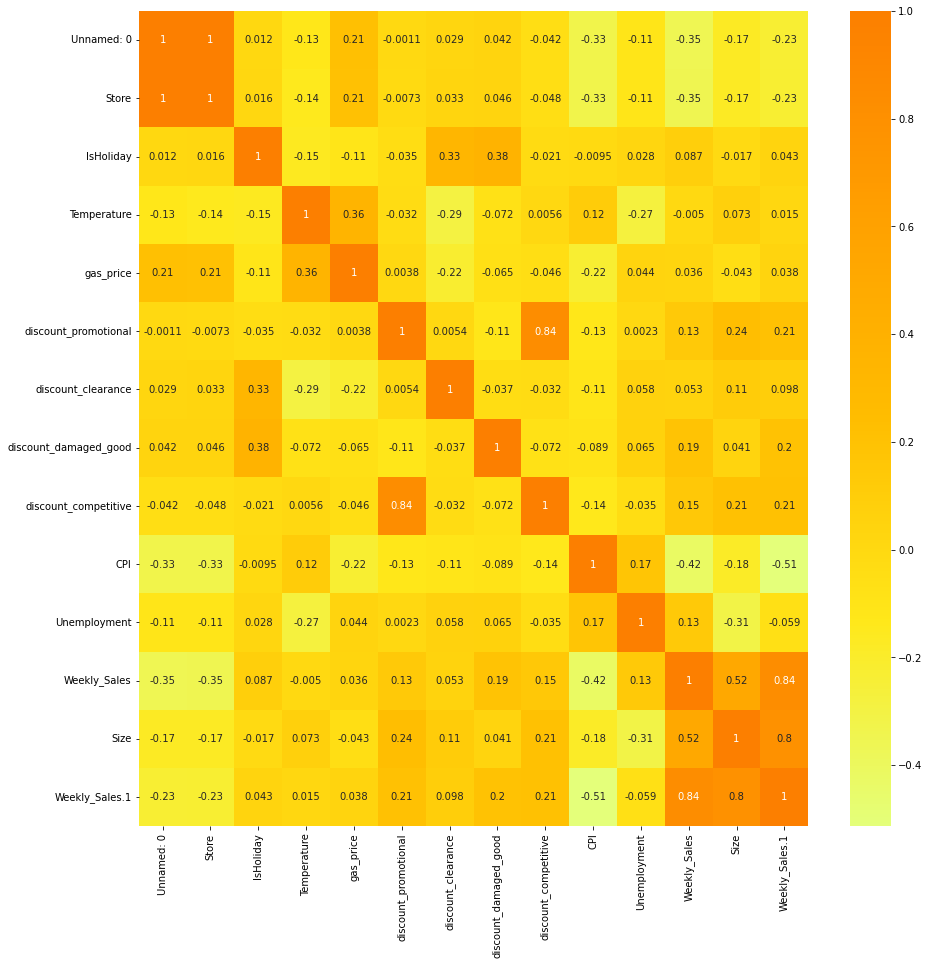

In [8]:
plt.figure(figsize=(15,15))
corr = dfa.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [9]:
dfa = dfa.drop("Unnamed: 0",axis=1)
dfa = dfa.drop("IsHoliday",axis=1)
dfa = dfa.drop("Temperature",axis=1)
dfa = dfa.drop("gas_price",axis=1)
dfa = dfa.drop("Date",axis=1)

In [10]:
dfa["StoreA"]=0
dfa["StoreB"]=0
dfa["StoreC"]=0
dfa.loc[dfa[dfa.Type =='A'].index, "StoreA"]=1
dfa.loc[dfa[dfa.Type =='B'].index, "StoreB"]=1
dfa.loc[dfa[dfa.Type =='C'].index, "StoreC"]=1

In [11]:
dfa=dfa.drop("Type",axis=1)

In [12]:
dfa

,Store,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Weekly_Sales,Size,Weekly_Sales.1,StoreA,StoreB,StoreC
0,1,9667.50,268.29,0.60,8368.15,223.659114,6.833,1643690.90,151315,1643690.90,1,0,0
1,1,8687.47,1594.87,2.20,2144.87,223.753643,6.833,1641957.44,151315,1641957.44,1,0,0
2,1,2706.87,3128.74,1.88,2396.68,223.917015,6.833,1611968.17,151315,1611968.17,1,0,0
3,1,8368.50,298.46,1.39,1340.29,224.562029,6.833,1439541.59,151315,1439541.59,1,0,0
4,1,2588.06,80.89,3.20,909.76,224.716695,6.833,1472515.79,151315,1472515.79,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,10,4407.90,0.00,7.20,3037.56,130.790968,7.170,1597868.05,126512,1827797.40,0,1,0
385,10,11848.88,20.00,47.52,3530.47,130.932548,7.170,1661767.33,126512,1708283.28,0,1,0
386,10,11273.56,245.91,27.00,2976.50,131.010333,7.170,1671857.57,126512,1671857.57,0,1,0
387,10,6091.96,62.82,2.82,3350.88,131.043000,7.170,1437059.26,126512,1694862.41,0,1,0


In [13]:
from sklearn.model_selection import train_test_split
X = dfa.drop('Weekly_Sales',axis=1) # Independet variable
y = dfa['Weekly_Sales'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred_sk = lin_reg.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

In [17]:
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  45681296682.18726
R square obtain for scikit learn library is : 0.8253999905525657


In [18]:
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

In [19]:
from sklearn.linear_model import Ridge

In [20]:
RLR = Ridge().fit(X_train,y_train)
pred1 = RLR.predict(X_train)
pred2 = RLR.predict(X_test)

In [21]:
print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Intercept of the Regresion Model was found to be ',lin_reg.intercept_)
Evaluate(1, pred1, pred2)

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  590054.888180835


NameError: name 'rc' is not defined

<Figure size 1080x432 with 0 Axes>